# Marine HeatWaves Analysis

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
add_data = '/home/matin/Downloads/MTech Project/data/'
# Open datasets
sst = xr.open_dataset(add_data + "MJJAS.nc")
sst40 = sst.sst.assign_coords({'time': sst.sst.time.dt.dayofyear})
sst40_time = sst40.time[27:]
sst1 = xr.open_dataset(add_data + "jjas40mean.nc")
da = xr.open_dataset(add_data + "Percentilejjas.nc")
Percentilejjas2 = xr.open_dataset(add_data + "Percentilejjas2.nc")

# Initialize lists for storing data
frq_40_list = []
frq_40jjas_list = []
inten_40_list = []

# Loop over data to calculate frq_40, frq_40jjas, and inten_40
for i in range(0, 6120, 153):
    dataset = sst40[27 + i: 153 + i].assign_coords({'time':da.time[27:].dt.dayofyear})

    change1 = dataset - Percentilejjas2
    change2 = change1.__xarray_dataarray_variable__.rename('sst')
    change = change2.assign_coords({'time':da.time[27:].dt.dayofyear})

    logic1 = xr.where(change > 0, 1, change)
    logic2 = xr.where(logic1 < 0, 0, logic1)
    logic = logic2.assign_coords({'time':da.time[27:].dt.dayofyear})

    l = []
    for j in range(0, 122):
        five_days_sum = logic[j:j + 5].sum('time', skipna=False)
        l.append(xr.where(five_days_sum < 5, 0, five_days_sum).data)
    five_xr = xr.DataArray(np.array(l), coords=[("time", logic[4:].time.data), ("lat", logic[4:].lat.data), ("lon", logic[4:].lon.data)])

    five_xr_logic = xr.where(five_xr == 5, 1, five_xr)

    m = []
    for k in range(0, 122):
        a = five_xr_logic[k:k + 2].sum("time", skipna=False)
        m.append(xr.where(a > 1, 0, a).data)
    five_xr_start = xr.DataArray(np.array(m), coords=[("time", logic[4:].time.data), ("lat", logic[4:].lat.data), ("lon", logic[4:].lon.data)])
    frq_40jjas_list.extend(five_xr_start.data)
    frq_40_list.append(five_xr_start.sum("time", skipna=False).data)
    inten_40_list.append(xr.where(five_xr_logic == 1, change[4:], five_xr_logic).sum("time", skipna=False).data)

# Create xarray DataArrays for frq_40, frq_40jjas, and inten_40
inten_40 = xr.DataArray(np.array(inten_40_list), coords=[("time", sst40_time[:40].data), ("lat", logic.lat.data), ("lon", logic.lon.data)])
cum_intensity = inten_40.sum("time", skipna=False)

frq_40 = xr.DataArray(np.array(frq_40_list), coords=[("time", sst40_time[:40].data), ("lat", logic.lat.data), ("lon", logic.lon.data)])


## Average Cumulative Intensity of MHWs Occuring During Monsoon of (1982-2021)

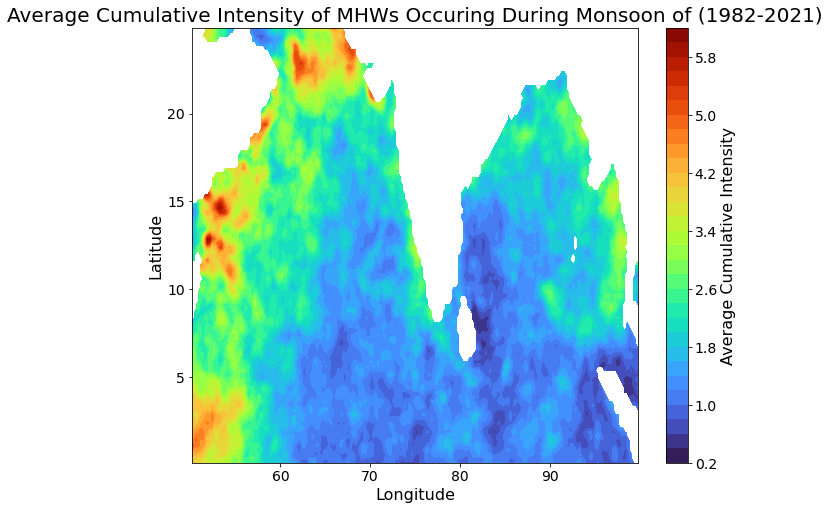

In [3]:
cum_intensity = inten_40.sum('time', skipna=False)

avg_cum_intensity = cum_intensity / 40

fig, ax = plt.subplots(figsize=(10, 8))

cmap = plt.get_cmap('turbo')

contour_plot = ax.contourf(avg_cum_intensity.lon, avg_cum_intensity.lat, avg_cum_intensity,
                           cmap=cmap, levels=30)

# Add a colorbar
cbar = plt.colorbar(contour_plot)
cbar.ax.set_ylabel('Average Cumulative Intensity', fontsize=16)
cbar.ax.tick_params(labelsize=14)

ax.set_title('Average Cumulative Intensity of MHWs Occuring During Monsoon of (1982-2021)', fontsize=20)
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)

ax.tick_params(labelsize=14)

plt.show()

fig.savefig('MHW40yr_intens.png', bbox_inches='tight')


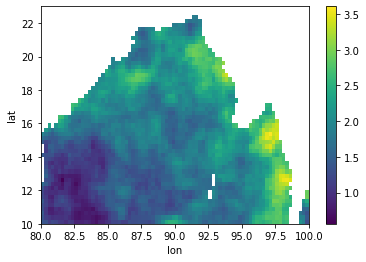

In [10]:
avg_cum_intensity.sel(lon=slice(80,100),lat=slice(10,23)).plot()

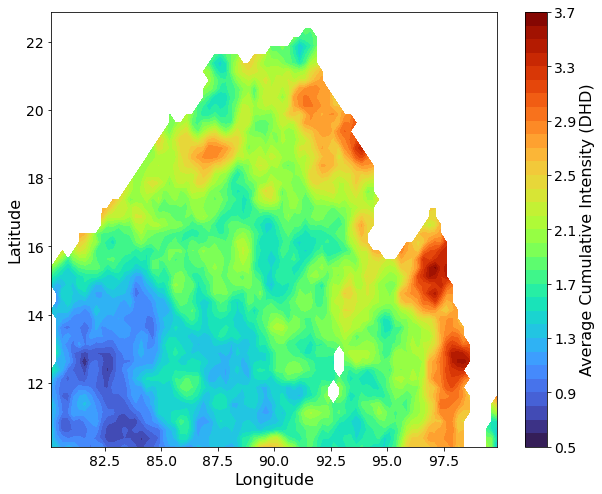

In [14]:
cum_intensity = inten_40.sum('time', skipna=False)

avg_cum_intensity = cum_intensity / 40

fig, ax = plt.subplots(figsize=(10, 8))

cmap = plt.get_cmap('turbo')
avg_cum_intensity = avg_cum_intensity.sel(lon=slice(80,100),lat=slice(10,23))
contour_plot = ax.contourf(avg_cum_intensity.lon, avg_cum_intensity.lat, avg_cum_intensity,
                           cmap=cmap, levels=30)

# Add a colorbar
cbar = plt.colorbar(contour_plot)
cbar.ax.set_ylabel('Average Cumulative Intensity (DHD)', fontsize=16)

cbar.ax.tick_params(labelsize=14)

#ax.set_title('Average Cumulative Intensity of MHWs Occuring During Monsoon of (1982-2021)', fontsize=20)
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)

ax.tick_params(labelsize=14)

plt.show()

fig.savefig('MHW40yr_intensbobox.png', bbox_inches='tight')


In [ ]:
fig.savefig('MHW40yr_intens.png', bbox_inches='tight')

## Average Frequency of MHWs Occuring During Monsoon of (1982-2021)

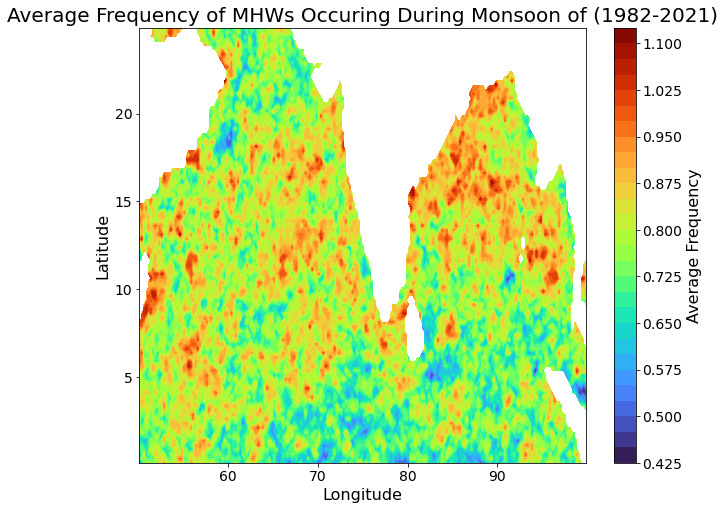

In [4]:
frq_40_sum = frq_40.sum("time",skipna=False)
frequency_40 = xr.where(frq_40_sum%2==0,frq_40_sum//2,(frq_40_sum+1)/2)

Avg_frequency_40 = frequency_40/ 40

fig, ax = plt.subplots(figsize=(10, 8))

cmap = plt.get_cmap('turbo')

contour_plot = ax.contourf(Avg_frequency_40.lon, Avg_frequency_40.lat, Avg_frequency_40,
                           cmap=cmap, levels=30)

# Add a colorbar
cbar = plt.colorbar(contour_plot)
cbar.ax.set_ylabel('Average Frequency', fontsize=16)
cbar.ax.tick_params(labelsize=14)

ax.set_title('Average Frequency of MHWs Occuring During Monsoon of (1982-2021)', fontsize=20)
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)

ax.tick_params(labelsize=14)
fig.savefig('MHW40yr_Freq.png', bbox_inches='tight')
plt.show()
